# Assignment 1
CS154 Fall 2019

Michelle S Lee

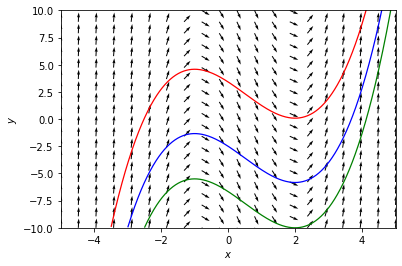

In [10]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)

## Vector field function
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]=x[0]**2-x[0]-2
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[-3.5,-10], [-3,-10], [-2.5,-10]]
color=['r','b','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-10,10,20) )
U = 1
V = X**2-X-2
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

ValueError: setting an array element with a sequence.

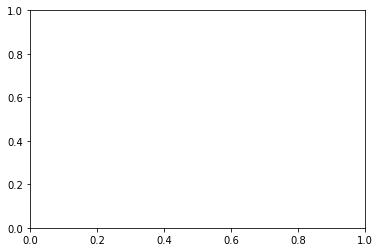

In [11]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)

## Vector field function
def vf(t,x):
    dx=np.zeros(2)
    dx[0]=x[0]*(1-x[0])-0.5*x[1]*x[0]
    dx[1]=x*(1-x)-0.5*t*x
    return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[-3.5,-10], [-3,-10], [-2.5,-10]]
color=['r','b','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-10,10,20) )
U = 1
V = X**2-X-2
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [6]:
from sympy import *
import matplotlib.pyplot as plt

x,y,t = var('x y t')
F = [x*(1-x)-0.5*x*y,y*(1-y)-0.5*x*y]

p = plot_vector_field

NameError: name 'plot_vector_field' is not defined

In [4]:
import numpy as np

# Q1: Dimensional Analysis and Linear Algebra

## Appropriate Combinations

### Systems of Linear Equations

_______
**Finding $[M]$**

We know that $[M]$ must be some combination of $$(x1)^\alpha(x2)^\beta(x3)^\gamma$$

We can sub in the dimensions for each physical variable and rewrite the left of the equation to contain the same values as the right.

$$[M]^1[L]^0[T]^0 = ([M]^{a_1}[L]^{b_1}[T]^{c_1})^\alpha([M]^{a_2}[L]^{b_2}[T]^{c_2})^\beta([M]^{a_3}[L]^{b_3}[T]^{c_3})^\gamma$$

This results in the following system of linear equations

$$1 = a_1\alpha+a_2\beta+a_3\gamma$$
$$0 = b_1\alpha+b_2\beta+b_3\gamma$$
$$0 = c_1\alpha+c_2\beta+c_3\gamma$$

Rewritten in matrix form, this looks like
$$\left(\begin{array}{cc} 
a_1 & a_2 & a_3\\
b_1 & b_2 & b_3\\
c_1 & c_2 & c_3
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
1\\
0\\
0
\end{array}\right)$$

_______

The same proccess can be replicated to find $[L]$ and $[T]$, with the only difference being the resulting combination of fundamental variables that we're looking for.
_______
**Finding $[L]$**

$$[M]^0[L]^1[T]^0 = ([M]^{a_1}[L]^{b_1}[T]^{c_1})^\alpha([M]^{a_2}[L]^{b_2}[T]^{c_2})^\beta([M]^{a_3}[L]^{b_3}[T]^{c_3})^\gamma$$

$$\left(\begin{array}{cc} 
a_1 & a_2 & a_3\\
b_1 & b_2 & b_3\\
c_1 & c_2 & c_3
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
0\\
1\\
0
\end{array}\right)$$

_______
**Finding $[T]$**

$$[M]^0[L]^0[T]^1 = ([M]^{a_1}[L]^{b_1}[T]^{c_1})^\alpha([M]^{a_2}[L]^{b_2}[T]^{c_2})^\beta([M]^{a_3}[L]^{b_3}[T]^{c_3})^\gamma$$

$$\left(\begin{array}{cc} 
a_1 & a_2 & a_3\\
b_1 & b_2 & b_3\\
c_1 & c_2 & c_3
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
0\\
0\\
1
\end{array}\right)$$

We could solve all three of these systems of linear equations by multiplying both sides of the equations by the inverse of the coefficient matrix*. 

The only risk to this approach would be if the coefficient matrix was singular (not invertible). However, a coefficient matrix is only singular if it contains either a row or column of zeroes. 

If the coefficient matrix contains a row of zeros, then the physical variable that the row corresponds to is already dimensionless**. Thus, that variable should not be considered when trying to derive the fundamental variables. 

If a column contains a row of zeros, then none of the physical variables contains that fundamental unit*** and thus we do not need to derive that fundamental variable as it is not relevant to our variables.

Another risk would be if the matrix was not square. However, if the coefficient matrix was not square that would mean that we are either considering more fundamental variables than physical variables, or more physical variables than fundamental variables. If we have more fundamental variables than physical variables to consider, then non-dimensionalisation is not possible. If we have more physical variables than fundamental variables, then we have some redundant physical variables (can be expressed as a linear combindation of the others) that can be left out from the equation.
______
\* The coefficient matrix is $$\left(\begin{array}{cc} 
a_1 & a_2 & a_3\\
b_1 & b_2 & b_3\\
c_1 & c_2 & c_3
\end{array}\right)$$
______
\** For example, if the first row was all zeroes, that would mean
$$ x_1 = [M]^{0}[L]^{0}[T]^{0}$$
Which would mean that $x_1$ is dimensionless. This can be generalized to any of the physical variables.
______
\*** For example, if the first column was all zeroes, that would mean
$$ x_1 = [M]^{0}[L]^{b_1}[T]^{c_1}$$
$$ x_2 = [M]^{0}[L]^{b_2}[T]^{c_2}$$
$$ x_3 = [M]^{0}[L]^{b_3}[T]^{c_3}$$
Which would mean that
$$ x_1 = [L]^{b_1}[T]^{c_1}$$
$$ x_2 = [L]^{b_2}[T]^{c_2}$$
$$ x_3 = [L]^{b_3}[T]^{c_3}$$


### Comparing the Systems

The coefficient matrices are exactly the same. 

The rows represent the powers of each of the fundamental variables in a physical variable. 

The columns represent the powers of a fundamental variable involved in each of the physical variables.

The set of the right hand side vectors of all the systems form a basis of dimension $R^n$ where $n$ is the number of fundamental variables we are trying to derive. 

## Using the Framework

Writing the physical quantities in terms of fundamental variables      
$$w = M^1L^1T^{-2}$$     
$$h = M^0L^1T^0$$     
$$q = M^0L^3T^{-1}$$    

_______
Finding $M$
$$\left(\begin{array}{cc} 
1 & 1 & -2\\
0 & 1 & 0\\
0 & 3 & -1
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
1\\
0\\
0
\end{array}\right)$$


In [10]:
A = np.array([[1,0,0],[1,1,3],[-2,0,-1]])
bM = np.array([1,0,0])
xM = np.linalg.solve(A,bM)

if (A@xM == bM).all:
    print("solution: ", xM)

solution:  [ 1.  5. -2.]


$$\left(\begin{array}{cc} 
1 & 1 & -2\\
0 & 1 & 0\\
0 & 3 & -1
\end{array}\right)
\left(\begin{array}{cc} 
1\\
5\\
-2
\end{array}\right) = \left(\begin{array}{cc} 
1\\
0\\
0
\end{array}\right)$$

$$M = wh^5q^{-2}$$

_______
Finding $L$
$$\left(\begin{array}{cc} 
1 & 1 & -2\\
0 & 1 & 0\\
0 & 3 & -1
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
0\\
1\\
0
\end{array}\right)$$

In [11]:
bL = np.array([0,1,0])
xL = np.linalg.solve(A,bL)

if (A@xL == bL).all:
    print("solution: ", xL)

solution:  [-0.  1. -0.]


$$\left(\begin{array}{cc} 
1 & 1 & -2\\
0 & 1 & 0\\
0 & 3 & -1
\end{array}\right)
\left(\begin{array}{cc} 
0\\
1\\
0
\end{array}\right) = \left(\begin{array}{cc} 
0\\
1\\
0
\end{array}\right)$$

$$L = h$$

_______
Finding $T$
$$\left(\begin{array}{cc} 
1 & 1 & -2\\
0 & 1 & 0\\
0 & 3 & -1
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
0\\
0\\
1
\end{array}\right)$$

In [12]:
bT = np.array([0,0,1])
xT = np.linalg.solve(A,bT)

if (A@xT == bT).all:
    print("solution: ", xT)

solution:  [-0.  3. -1.]


$$\left(\begin{array}{cc} 
1 & 1 & -2\\
0 & 1 & 0\\
0 & 3 & -1
\end{array}\right)
\left(\begin{array}{cc} 
0\\
3\\
-1
\end{array}\right) = \left(\begin{array}{cc} 
0\\
0\\
1
\end{array}\right)$$

$$T = h^3q^{-1}$$

## Combination with Units

### Using Linear Equations

We have already found the vectors that allowed us to express the fundamental units in terms of the physical quantities. Putting these vectors together allows us to create a change of basis matrix from the fundamental units to the physical quanties.

Algebraicly, all we are doing is replacing the fundamental units with their equivalents expressed in physical quantities which we found in the last question

Finding $x_4 = M^{a_4}L^{b_4}T^{c_4}$

$$M^{a_4}L^{b_4}T^{c_4}= (wh^5q^{-2})^{a_4}(h)^{b_4}(h^3q^{-1})^{c_4}$$


$$\left(\begin{array}{cc} 
1 & 0 & 0\\
5 & 1 & 3\\
-2 & 0 & -1
\end{array}\right)
\left(\begin{array}{cc} 
a_4\\
b_4\\
c_4
\end{array}\right) = \left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right)$$


Using this change of basis matrix, we can change the way we express the variable $x_4$ from fundamental units to physical quantities by solving this equation. To solve this equation, we just left multiply the vector of fundamental units (coordinates in the old basis) by the change of basis matrix.


### Explaining with Basis and Linear Combinations

Essentially through this process, we are just changing the basis. In section (a), we were finding the change of basis matrix from the physical variables to the fundamental units. In section (c), we use that change of basis matrix to change the way we express a variable from physical variables to fundamental units. The reason we can do part(a) is that all fundamental units can be expressed as a linear combination of the physical variables (assuming enough non-conflicting independent linear equations). We can do part(c) because vice versa is also True by linearity.

As discused in part a)i), this method would fail if the coefficient matrix was not invertible. In that section, I also discussed how that would only be possible if we were trying to undimensionalise non-dimensional variables, if we were trying to express a fundamental unit that was not used in any of our physical variables, if we were using redundant physical units that were unecessary, or if we simply have insuffient information/ equations/ variables to fully non-dimensionalize.

## Expressing Power

$$P = ML^2T^{-3}$$
$$P= (wh^5q^{-2})^1(h)^2(h^3q^{-1})^{-3}$$


$$\left(\begin{array}{cc} 
1 & 0 & 0\\
5 & 1 & 3\\
-2 & 0 & -1
\end{array}\right)
\left(\begin{array}{cc} 
1\\
2\\
-3
\end{array}\right) = \left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right)$$


Using this change of basis matrix, we can change the way we express the variable $x_4$ from fundamental units to physical quantities by solving this equation. To solve this equation, we simply complete the left multiplication by the change of basis matrix.


In [67]:
AN = np.linalg.solve(A,np.array([[1,0,0],[0,1,0],[0,0,1]]))
xN = np.array([[1],[2],[-3]])
bN = AN.dot(xN)
if (AN@xN == bN).all():
    print(bN)

[[ 1.]
 [-2.]
 [ 1.]]


$$P =  wh^{-2}q$$

## Optional: Automate

# Q2: Data Interpolation

## Lagrange Cubic Spline

We know that:

$$f_i''(x_i)=k_i$$
$$f_i''(x_{i+1})=k_{i+1}$$
$$x_{i+1}=x_i+h$$

And that the second derivative of the global polynomial is linear and can be written as: 
$$f_i''(x)=\frac{x_{i+1}-x}{h}k_{i} + \frac{x-x_{i}}{h}k_{i+1}$$

## Integrate

We can integrate this twice to get the cubic function

$$f_i(x)=\int \Bigg( \int \Bigg(\frac{x_{i+1}-x_i}{h}k_{i+1} + \frac{x_i-x_{i+1}}{h}k_i \Bigg) dx \Bigg) dx$$

$$f_i(x)=\frac{(x_{i+1}-x)^3}{6h}k_i+\frac{(x-x_i)^3}{6h}k_{i+1} + A_ix + B_i$$

## Expressing the Constants

Subbing in $f_i(x_i) = y_i$

$$y_i=\frac{(x_{i+1}-x_i)^3}{6h}k_i+\frac{(x_i-x_i)^3}{6h}k_{i+1} + A_i(x_i) + B_i$$
$$y_i=\frac{(x_{i+1}-x_i)^3}{6h}k_i+ A_i(x_i) + B_i$$


Subbing in $x_{i+1} = x_i+h$

$$y_i=\frac{h^2}{6}k_i + A_i(x_i) + B_i$$


Subbing in $f_i(x_{i+1}) = y_{i+1}$

$$y_{i+1}=\frac{(x_{i+1}-x_{i+1})^3}{6h}k_i+\frac{(x_i-x_{i+1})^3}{6h}k_{i+1} + A_i(x_{i+1}) + B_i$$
$$y_{i+1}=\frac{(x_i-x_{i+1})^3}{6h}k_{i+1}+ A_i(x_{i+1}) + B_i$$


Subbing in $x_{i+1} = x_i+h$

$$y_{i+1}=\frac{h^2}{6}k_{i+1} + A_i(x_{i+1}) + B_i$$


Expressing $A_i$ by subtracting $y_{i+1}$ from $y_i$

$$y_{i+1}-y_i = \frac{h^2}{6}(k_{i+1}-k_i) + A_i(x_{i+1}-x_i)$$
$$A_i(x_{i+1}-x_i) = y_{i+1}-y_i - \frac{h^2}{6}(k_{i+1}-k_i)$$

Subbing in $x_{i+1} = x_i+h$
$$A_i = \frac{y_{i+1}-y_i - \frac{h^2}{6}(k_{i+1}-k_i)}{h}$$


Similarly with $B_i$

$$B_i = \frac{x_{i+1}y_i - x_iy_{i+1}-\frac{h^2}{6}(x_{i+1}k_i - x_{i}k_{i+1})}{h} $$

## Shifting Indices

The entire process is exactly the same except that we are replacing $x_i$ with $x_{i+1}$, $x_{i+1}$ with $x_{i+2}$, $k_i$ with $k_{i+1}$, $k_{i+1}$ with $k_{i+2}$, $A_{i}$ with $A_{i+1}$, and $B_{i}$ with $B_{i+1}$. Because they are all unique variables, the algebraic manipulation will be the same.

Thus,
$$f_{i+1}(x)=\frac{(x_{i+2}-x)^3}{6h}k_{i+1}+\frac{(x-x_{i+1})^3}{6h}k_{i+2} + A_{i+1}x + B_{i+1}$$


## $k'$ in terms of $y'$

$$f_i(x)=\frac{(x_{i+1}-x)^3}{6h}k_i+\frac{(x-x_i)^3}{6h}k_{i+1} + A_ix + B_i$$

Subbing in the derived $A_i$ and $B_i$

$$f_i(x)=\frac{(x_{i+1}-x)^3}{6h}k_i+\frac{(x-x_i)^3}{6h}k_{i+1} + \frac{y_{i+1}-y_i - \frac{h^2}{6}(k_{i+1}-k_i)}{h}
x + \frac{x_{i+1}y_i - x_iy_{i+1}-\frac{h^2}{6}(x_{i+1}k_i - x_{i}k_{i+1})}{h}$$

Deriving to find $f_i'(x)$

$$f_i'(x)=-\frac{(x_{i+1}-x)^2}{2h}k_i+\frac{(x-x_i)^2}{2h}k_{i+1} + \frac{y_{i+1}-y_i - \frac{h^2}{6}(k_{i+1}-k_i)}{h}$$

Finding $f'_i(x_{i+1})$

$$f_i'(x_{i+1})=-\frac{(x_{i+1}-x_{i+1})^2}{2h}k_i+\frac{(x_{i+1}-x_i)^2}{2h}k_{i+1} + \frac{y_{i+1}-y_i - \frac{h^2}{6}(k_{i+1}-k_i)}{h}$$

$$f_i'(x_{i+1})=\frac{h}{2}k_{i+1} + \frac{y_{i+1}-y_i - \frac{h^2}{6}(k_{i+1}-k_i)}{h}$$

$$f_i'(x_{i+1})=\frac{h}{2}k_{i+1} + \frac{y_{i+1}-y_i}{h} - \frac{h}{6}k_{i+1} + \frac{h}{6}k_i$$

$$f_i'(x_{i+1})= -\frac{h}{3}k_{i+1} + \frac{y_{i+1}-y_i}{h} +\frac{h}{6}k_{i}$$

Finding $f'_{i+1}(x)$

$$f_{i+1}(x) = \frac{(x_{i+2}-x)^3}{6h}k_{i+1}+\frac{(x-x_{i+1})^3}{6h}k_{i+2} + A_{i+1}x + B_{i+1}$$


$$f'_{i+1}(x) = -\frac{(x_{i+2}-x)^2}{2h}k_{i+1}+\frac{(x-x_{i+1})^2}{2h}k_{i+2} + A_{i+1}$$

$$f'_{i+1}(x_{i+1}) = -\frac{(x_{i+2}-x_{i+1})^2}{2h}k_{i+1}+\frac{(x_{i+1}-x_{i+1})^2}{2h}k_{i+2} + A_{i+1}$$


$$f'_{i+1}(x_{i+1}) = -\frac{h}{2}k_{i+1} + A_{i+1}$$

Subbing in $A_{i+1}$

$$f'_{i+1}(x_{i+1}) = -\frac{h}{2}k_{i+1} + \frac{y_{i+2}-y_{i+1} - \frac{h^2}{6}(k_{i+2}-k_{i+1})}{h}$$


$$f'_{i+1}(x_{i+1}) = -\frac{h}{2}k_{i+1} + \frac{y_{i+2}-y_{i+1}}{h} - \frac{h}{6}(k_{i+2}-k_{i+1})$$

$$f'_{i+1}(x_{i+1}) = -\frac{h}{3}k_{i+1} + \frac{y_{i+2}-y_{i+1}}{h} - \frac{h}{6}k_{i+2}$$



Since $f_i'(x_{i+1}) = f'_{i+1}(x_{i+1})$

$$\frac{h}{3}k_{i+1} + \frac{y_{i+1}-y_i}{h} + \frac{h}{6}k_{i} = -\frac{h}{3}k_{i+1} + \frac{y_{i+2}-y_{i+1}}{h} - \frac{h}{6}k_{i+2}$$



$$2hk_{i+1} + \frac{6(y_{i+1}-y_i)}{h} + hk_{i} = -2hk_{i+1} + \frac{6(y_{i+2}-y_{i+1})}{h} - hk_{i+2}$$


$$2hk_{i+1} + \frac{6(y_{i+1}-y_i)}{h} + hk_{i} = -2hk_{i+1} + \frac{6(y_{i+2}-y_{i+1})}{h} - hk_{i+2}$$


$$hk_{i} + 4hk_{i+1} +  hk_{i+2} = \frac{6(y_{i+2}-y_{i+1})}{h} - \frac{6(y_{i+1}-y_i)}{h}$$


$$hk_{i} + 4hk_{i+1} +  hk_{i+2} = 6 \Bigg( \frac{y_{i+2}-y_{i+1}}{h} - \frac{y_{i+1}-y_i}{h} \Bigg)$$


## Full system of Equations

Since we can assume a natural spline
$$f_i''(x)=\frac{x_{i+1}-x}{h}k_{i} + \frac{x-x_{i}}{h}k_{i+1}$$

$$f_1''(x_1) == 0$$

$$f_1''(x_1)=\frac{x_2-x_1}{h}k_{1} + \frac{x_1-x_{1}}{h}k_{2}$$

$$\frac{x_2-x_1}{h}k_{1} = 0$$

$$f_n'(x_{n+1}) == 0$$
$$f_n''(x_n+1)=\frac{x_{n+1}-x_{n+1}}{h}k_{n} + \frac{x_{n+1}-x_{n}}{h}k_{n+1}$$

$$\frac{x_{n+1}-x_{n}}{h}k_{n+1}=0$$


Using the two equations we derived for the natural spline above combined with the equation we derived in (e), we can define a set of matrices by which we can solve for the unknown $k$s

$$\frac{x_2-x_1}{h}k_{1} = 0$$
$$\frac{x_{n+1}-x_{n}}{h}k_{n+1}=0$$
for each datapoint $i$,
$$\frac{h^2}{6}k_{i} + \frac{4h^2}{6}k_{i+1} +  \frac{h^2}{6}k_{i+2} = y_i-2y_{i+1}+y_{i+2}$$



We would want to solve for the matrix of $k$s in the following equation:

$$\left(\begin{array}{cc} 
\frac{x_2-x_1}{h} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ...\\
\frac{h^2}{6} & \frac{4h^2}{6} & \frac{h^2}{6} & 0 & 0 & 0 & 0 & 0 & ...\\
0 & \frac{h^2}{6} & \frac{4h^2}{6} & \frac{h^2}{6} & 0 & 0 & 0 & 0 & ...\\
&&&&...\\
&&&&&&... && \frac{x_{n+1}-x_n}{h}
\end{array}\right)
\left(\begin{array}{cc} 
k_1\\
k_2\\
k_3\\
...\\
\\
k_{n+1}
\end{array}\right) = \left(\begin{array}{cc} 
0\\
y_1-2y_2+y_3\\
y_2-2y_3+y_4\\
...\\
\\
0
\end{array}\right)$$

## Implementation and Comparison

**Cubic Spline without Lagrange**

In [6]:
def cubicSpline(x1,x2,x3,y1,y2,y3):
    A = np.array([[x1**3,x1**2,x1,1,0,0,0,0],[x2**3,x2**2,x2,1,0,0,0,0],[0,0,0,0,x2**3,x2**2,x2,1],[0,0,0,0,x3**3,x3**2,x3,1],[3*x2**2,2*x2,0,0,-3*x2**2,-2*x2,0,0],[6*x2,2,0,0,-6*x2,-2,0,0],[6*x1,2,0,0,0,0,0,0],[0,0,0,0,6*x3,2,0,0]])
    b = np.array([y1,y2,y2,y3,0,0,0,0])
    print(A)
    print(b)
    return(A@b)

In [8]:
cubicSpline(0,90,180,1/3, 2/3,1)

[[      0       0       0       1       0       0       0       0]
 [ 729000    8100      90       1       0       0       0       0]
 [      0       0       0       0  729000    8100      90       1]
 [      0       0       0       0 5832000   32400     180       1]
 [  24300     180       0       0  -24300    -180       0       0]
 [    540       2       0       0    -540      -2       0       0]
 [      0       2       0       0       0       0       0       0]
 [      0       0       0       0    1080       2       0       0]]
[0.33333333 0.66666667 0.66666667 1.         0.         0.
 0.         0.        ]


array([1.00000000e+00, 2.48461000e+05, 0.00000000e+00, 0.00000000e+00,
       8.22000000e+03, 1.81333333e+02, 1.33333333e+00, 0.00000000e+00])

**Cubic Spline with Lagrange**

In [2]:
def cubicSplineLagrange(points):
    #___INITIATE__
    n = len(points)
    h = points[1] - points[0]
    
    #___CREATE COEF MATRIX (A)__
    # initiate first row of matrix with the starting natural spline condition
    A = [[(points[1]-points[0])/h] + [0 for _ in range(n-1)]]
    # add a row of equations for each datapoint
    for row in range(1,n):
        A.append([0 for _ in range(row-1)] + [h**2/6, 4*h**2/6,h**2/6] + [0 for _ in range(n-row-2)])
    # add the final natural spline condition
    A.append([0 for _ in range(n-1)] + [(x[-1]-x[-2])/h])
    A = np.array(A)

    #___CREATE RESULT VECTOR (b)__
    b = np.array([0] + [y[i]-2*y[i+1]+y[i+2] for i in range(n)] + [0])
    
    #___SOLVE FOR VECTOR OF UNKNOWNS (x/k)__
    return(A@b)

Making use of the Lagrange method makes it much easier to compute cubic splines for a large number of datapoints. 

While it is definitely possible to generalize the cubic spline method without Lagrange to handle mutiple datapoints, it would involve a lot of algebraic manipulation as we will have to derive and solve for many unique equations. 

In contrast, making use of the symmetry in the equations using Lagrange allows us to easily solve for a theoretically unlimited number of datapoints without doing any additional algebra.

In theory, both of these algorithms should take O(n) time, where n is the number of datapoints involved. This is because we do a "fixed" number of steps for each datapoint we are considering. That said even though both the equations take the same order of magnitude of time, the reduction of the coefficient on that time complexity is still notable.

Additionally, the Lagrange algotihm will be undoubtably more elegant and readable.

A similar argument can be made for space complexity


# Q3: Non-linear systems

## Dimensions of Lift and Drag

$$mgsin(\theta)+\frac{1}{2}\rho v^2C_DA=0$$
$$\frac{1}{2}\rho v^2C_DA=-mgsin(\theta)$$

$$\frac{M}{L^3} (\frac{L}{T})^2C_DL^2=-M*\frac{L}{T^2}$$
$$\frac{ML}{T^2}C_D=-\frac{ML}{T^2}$$

Thus, $C_D$ must be dimensionless to make the dimesnions on both sides of the equation equal.

The same process can be repeated to find $C_L$:
$$mgcos(\theta)-\frac{1}{2}\rho v^2C_LA=0$$
$$\frac{1}{2}\rho v^2C_LA=mgcos(\theta)$$

$$\frac{M}{L^3} (\frac{L}{T})^2C_LL^2=M*\frac{L}{T^2}$$
$$\frac{ML}{T^2}C_L=\frac{ML}{T^2}$$

Thus, $C_L$ must be dimensionless to make the dimesnions on both sides of the equation equal.



## Expressions of Fundamental Units

$$m = M$$
$$g = LT^{-2}$$
$$A = L^2$$

$$\left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 1 & -2\\
0 & 2 & 0
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
M\\
L\\
T
\end{array}\right)$$

$$\left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 1 & -2\\
0 & 2 & 0
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\
\beta\\
\gamma
\end{array}\right) = \left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right)$$

In [4]:
np.linalg.solve(np.array([[1,0,0],[0,1,2],[0,-2,0]]),np.array([[1,0,0],[0,1,0],[0,0,1]]))

array([[ 1.  ,  0.  ,  0.  ],
       [-0.  , -0.  , -0.5 ],
       [ 0.  ,  0.5 ,  0.25]])

$$\left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 1 & -2\\
0 & 2 & 0
\end{array}\right)
\left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 0 & 0.5\\
0 & -0.5 & 0.25
\end{array}\right) = \left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right)$$


$$M = m$$
$$L = A^{0.5}$$
$$T = g^{-0.5}A^{0.25}$$

##  Non-dimensionalize the System

$$v = LT^{-1}$$
$$v = A^{0.5}(g^{-0.5}A^{0.25})^{-1}$$
$$v = g^{0.5}A^{0.25}$$
$$\bar v = v/v$$
$$\bar v = v/(g^{0.5}A^{0.25})$$
$$v = \bar v(g^{0.5}A^{0.25})$$




$$\rho = ML^{-3}$$
$$\rho = m(A^{0.5})^{-3}$$
$$\rho = mA^{-1.5}$$
$$\bar \rho = \rho / \rho$$
$$\bar \rho = \rho /(mA^{-1.5})$$
$$\rho = \bar \rho (mA^{-1.5})$$

In [8]:
np.linalg.solve(np.array([[1,0,0],[0,1,2],[0,-2,0]]),np.array([[1,0,0],[0,1,0],[0,0,1]])).dot(np.array([0,1,-1]))

array([0.  , 0.5 , 0.25])

In [9]:
np.linalg.solve(np.array([[1,0,0],[0,1,2],[0,-2,0]]),np.array([[1,0,0],[0,1,0],[0,0,1]])).dot(np.array([1,-3,0]))

array([ 1. ,  0. , -1.5])

$$mgsin(\theta)+\frac{1}{2}\rho v^2C_DA=0$$
$$mgsin(\theta)=-\frac{1}{2}\rho v^2C_DA$$
$$\frac{-2mgsin(\theta)}{C_DA}=\rho v^2$$
$$\frac{-2mgsin(\theta)}{C_DA}=\bar \rho (mA^{-1.5}) (\bar v(g^{0.5}A^{0.25}))^2$$

$$\frac{-2mgsin(\theta)}{C_DA}=\bar \rho mA^{-1} \bar v^2g$$

$$C_D = \frac{-2mgsin(\theta)}{\bar \rho m\bar v^2g}$$

$$C_D = \frac{-2sin(\theta)}{\bar \rho \bar v^2}$$

The same process can be done to find $C_L$
$$C_L = \frac{2cos(\theta)}{\bar \rho \bar v^2}$$


## Newton's Method

$$1 = \frac{2cos(\theta)}{\bar \rho \bar v^2}$$

$$\bar v^2 = 2cos(\theta)$$
$$\theta = cos^{-1}(\frac{\bar v^2}{2})$$
$$\frac{\delta}{\delta \theta} =-\frac{x}{\sqrt{1-\frac{x^4}{4}}}$$

In [17]:
import math
def dx(f, x):
    return abs(0-f(x))

def newtons_method(f, df, x0, e):
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = dx(f, x0)
    print('Root is at: ', x0)
    print('f(x) at root is: ', f(x0))

def f(x):
    return(math.acos(x**2/2))

def df(x):
    return(-x/(math.sqrt(1-x**4/4)))

if __name__=="__main__":
    newtons_method(f, df, 1.4, 0.3)

Root is at:  1.4
f(x) at root is:  0.20033484232312024


In [19]:
import math
def dx(f, x):
    return abs(0-f(x))

def newtons_method(f, df, x0, e):
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = dx(f, x0)
    print('Root is at: ', x0)
    print('f(x) at root is: ', f(x0))

def f(x):
    return(math.acos(x**2/2))

def df(x):
    return(-x/(math.sqrt(1-x**4/4)))

if __name__=="__main__":
    newtons_method(f, df, 1.3, 0.3)

ValueError: math domain error

In [14]:
math.acos(1.414**2/2)

0.02457703000328076

Since this is a function that is not continuous at its root (or only continuous from the left or the right, not both), Newton's method will not work well for approximating it. This is because Newton's method relies on linear approximations of the function to get sequentially better estimates of the function at its real root. However, if the function is mostly undefined, we are unable to sequentially estimate the root as when we get closer to the root, we get an undefined function. Newton's method will only work for points extremely close to the root which defeats the purpose of the approximation.